**EXPLORATION ET VISUALISATION**

In [69]:
import exploration

In [70]:
path = r"C:\Users\Olivier\Desktop\DATA_SCIENCE\DATASCIENTEST\chest_xray\DATA"

In [71]:
df = build_df(path, 'jpeg')

Build


In [72]:
df

,Label_name,Label_int,Label_pathology,Label_pathology_int,Filename,Filepath
0,NORMAL,0,normal,0,IM-0001-0001.jpeg,C:\Users\Olivier\Desktop\DATA_SCIENCE\DATASCIE...
1,NORMAL,0,normal,0,IM-0003-0001.jpeg,C:\Users\Olivier\Desktop\DATA_SCIENCE\DATASCIE...
2,NORMAL,0,normal,0,IM-0005-0001.jpeg,C:\Users\Olivier\Desktop\DATA_SCIENCE\DATASCIE...
3,NORMAL,0,normal,0,IM-0006-0001.jpeg,C:\Users\Olivier\Desktop\DATA_SCIENCE\DATASCIE...
4,NORMAL,0,normal,0,IM-0007-0001.jpeg,C:\Users\Olivier\Desktop\DATA_SCIENCE\DATASCIE...
...,...,...,...,...,...,...
5851,PNEUMONIA,1,bacteria,1,person1949_bacteria_4880.jpeg,C:\Users\Olivier\Desktop\DATA_SCIENCE\DATASCIE...
5852,PNEUMONIA,1,bacteria,1,person1950_bacteria_4881.jpeg,C:\Users\Olivier\Desktop\DATA_SCIENCE\DATASCIE...
5853,PNEUMONIA,1,bacteria,1,person1951_bacteria_4882.jpeg,C:\Users\Olivier\Desktop\DATA_SCIENCE\DATASCIE...
5854,PNEUMONIA,1,bacteria,1,person1952_bacteria_4883.jpeg,C:\Users\Olivier\Desktop\DATA_SCIENCE\DATASCIE...


In [73]:
df = add_infos(df)

In [74]:
df

,Label_name,Label_int,Label_pathology,Label_pathology_int,Filename,Filepath,Rep,Height,Width,Size,Mode,Mean,Median,Std,Seuil100
0,NORMAL,0,normal,0,IM-0001-0001.jpeg,C:\Users\Olivier\Desktop\DATA_SCIENCE\DATASCIE...,test,1317,1857,2445669,L,131.00,132.0,57.10,70.70
1,NORMAL,0,normal,0,IM-0003-0001.jpeg,C:\Users\Olivier\Desktop\DATA_SCIENCE\DATASCIE...,test,1509,2111,3185499,L,142.45,150.0,60.67,77.07
2,NORMAL,0,normal,0,IM-0005-0001.jpeg,C:\Users\Olivier\Desktop\DATA_SCIENCE\DATASCIE...,test,1837,2031,3730947,L,136.25,138.0,55.40,75.37
3,NORMAL,0,normal,0,IM-0006-0001.jpeg,C:\Users\Olivier\Desktop\DATA_SCIENCE\DATASCIE...,test,1326,1663,2205138,L,148.67,152.0,42.32,84.65
4,NORMAL,0,normal,0,IM-0007-0001.jpeg,C:\Users\Olivier\Desktop\DATA_SCIENCE\DATASCIE...,test,1818,2053,3732354,L,137.70,137.0,53.97,75.99
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5851,PNEUMONIA,1,bacteria,1,person1949_bacteria_4880.jpeg,C:\Users\Olivier\Desktop\DATA_SCIENCE\DATASCIE...,val,944,1416,1336704,L,127.54,141.0,58.60,72.71
5852,PNEUMONIA,1,bacteria,1,person1950_bacteria_4881.jpeg,C:\Users\Olivier\Desktop\DATA_SCIENCE\DATASCIE...,val,864,1256,1085184,L,141.43,151.0,58.38,79.68
5853,PNEUMONIA,1,bacteria,1,person1951_bacteria_4882.jpeg,C:\Users\Olivier\Desktop\DATA_SCIENCE\DATASCIE...,val,656,1016,666496,L,140.82,160.0,54.67,79.59
5854,PNEUMONIA,1,bacteria,1,person1952_bacteria_4883.jpeg,C:\Users\Olivier\Desktop\DATA_SCIENCE\DATASCIE...,val,952,1192,1134784,L,143.10,159.0,55.27,81.21


---

**i) Les données sont déjà réparties dans 3 répertoires principaux: test, train et val**

Voici la répartition obtenue en nombre de fichiers (5856 au total):

In [75]:
soustotal = df[['Filename', 'Rep']].groupby('Rep').agg('count')

soustotal['pourcentage'] = round(soustotal / soustotal.sum() * 100, 2)

soustotal

,Filename,pourcentage
Rep,,
test,624,10.66
train,5216,89.07
val,16,0.27


On trouve actuellement environ 89 % dans le 'train' et 10.7 % pour train

**ii) Dans chaque répertoire principal, les données sont aussi classées dans 2 répertoires NORMAL et PNEUMONIA en guise de label**

Voici la répartition obtenue globalement:

In [76]:
df[['Filename', 'Label_name']].groupby('Label_name').agg('count')  

,Filename
Label_name,
NORMAL,1583
PNEUMONIA,4273


Il y a presque 3 fois plus de cas de pneumonie que de cas normaux. S'agissant de données médicales, cela parait cohérent.

A noter: dans les répertoires 'PNEUMONIA', les fichiers comportent les chaines 'virus' ou 'bacteria' (exemple "person88_bacteria_438"):

In [77]:
pneumonia = df[df['Label_name'] == 'PNEUMONIA']

pneumo = pneumonia[['Filename', 'Label_pathology']].groupby('Label_pathology').agg('count') 

pneumo['pourcentage'] = round(pneumo / pneumo.sum() * 100, 2)

pneumo

,Filename,pourcentage
Label_pathology,,
bacteria,2780,65.06
virus,1493,34.94


On a donc 65% de cas 'bactérie' et 35% de cas 'virus'

**iii) On peut également faire quelques analyses sur la taille des images en pixels:**

In [78]:
print('Hauteur moyenne :', round(df['Height'].mean(), 2))
print('Hauteur min :', df['Height'].min())
print('Hauteur max :', df['Height'].max())

print()

print('Largeur moyenne :', round(df['Width'].mean(), 2))
print('Largeur min :', df['Width'].min())
print('Largeur max: ', df['Width'].max())

Hauteur moyenne : 970.69
Hauteur min : 127
Hauteur max : 2713

Largeur moyenne : 1327.88
Largeur min : 384
Largeur max:  2916


- hauteurs comprises entre 127 et 2713, avec une moyenne de 971 pixels environ

- largeurs comprises entre 384 et 2916, avec une moyenne de 1328 pixels environ

On note donc des formats d'image très variables. On a des images présentant des poumons entiers, mais également parfois incomplètes (le haut et le bas des poumons n'apparait pas)

Représentation sous forme de nuage de points:

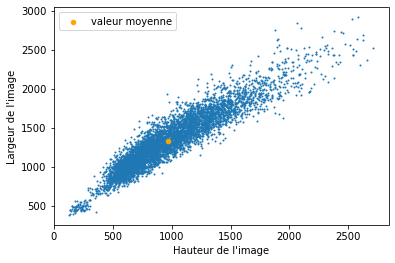

In [79]:
plt.scatter(df['Height'], df['Width'], s = 1)
plt.scatter(df['Height'].mean(), df['Width'].mean(), color = 'orange', s = 20, label = 'valeur moyenne')
plt.xlabel("Hauteur de l'image")
plt.ylabel("Largeur de l'image")
plt.legend()
plt.show() 

L'image la plus petite mesure 127 x 384 pixels:

In [80]:
df[df['Size'] == df['Size'].min()]  

,Label_name,Label_int,Label_pathology,Label_pathology_int,Filename,Filepath,Rep,Height,Width,Size,Mode,Mean,Median,Std,Seuil100
4306,PNEUMONIA,1,virus,2,person407_virus_811.jpeg,C:\Users\Olivier\Desktop\DATA_SCIENCE\DATASCIE...,train,127,384,48768,L,123.56,129.0,40.11,83.51


L'image la plus grande mesure 2583 x 2916 pixels:

In [81]:
df[df['Size'] == df['Size'].max()] 

,Label_name,Label_int,Label_pathology,Label_pathology_int,Filename,Filepath,Rep,Height,Width,Size,Mode,Mean,Median,Std,Seuil100
1858,NORMAL,0,normal,0,NORMAL2-IM-1257-0001.jpeg,C:\Users\Olivier\Desktop\DATA_SCIENCE\DATASCIE...,train,2583,2916,7532028,L,147.21,164.0,77.54,74.07


**iv) Images niveaux de gris / couleur / channels**

Toutes les images sont au format JPEG.

In [82]:
df[['Filename', 'Mode']].groupby('Mode').agg('count')

,Filename
Mode,
L,5856


avec 'L' (8-bit pixels, black and white) et 'RGB' (3x8-bit pixels, true color).

Les images sont majoritairement en noir et blanc (283 sont en couleur).

**v) Planche contact**

Affichage au hasard (samples) de 5 images NORMAL et 5 images PNEUMONIA

In [83]:
list_images = []

df_normal = df[df['Label_name'] == 'NORMAL']

for i in df_normal.sample(n = 5)['Filepath']:
    list_images.append(i)

df_pneumonia = df[df['Label_name'] == 'PNEUMONIA']

for i in df_pneumonia.sample(n = 5)['Filepath']:
    list_images.append(i)

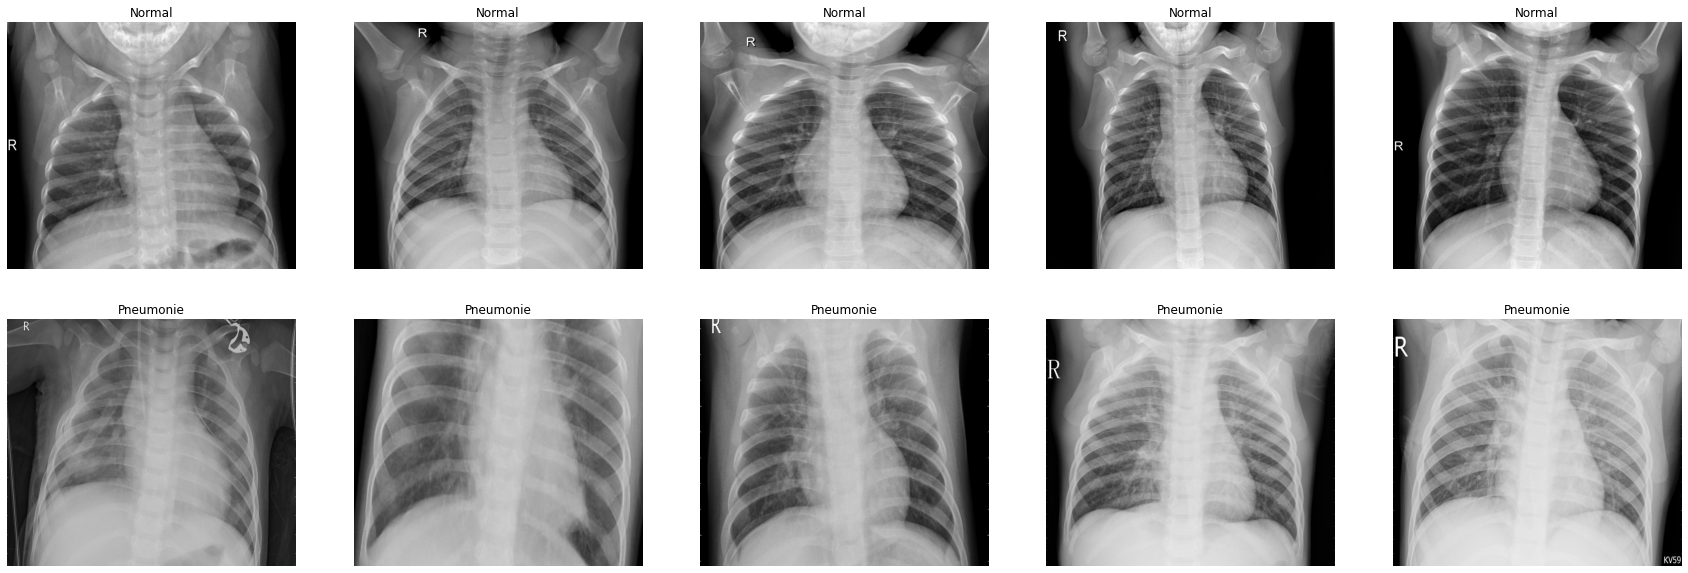

In [84]:
planche_contact(list_images)

**vi) Histogrammes**

On affiche ci-dessous l'histogramme correspondant aux images de la planche contact. Sont également indiquées les valeurs moyennes et médianes.

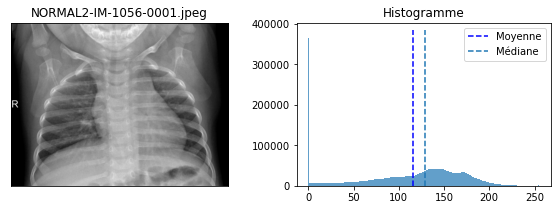

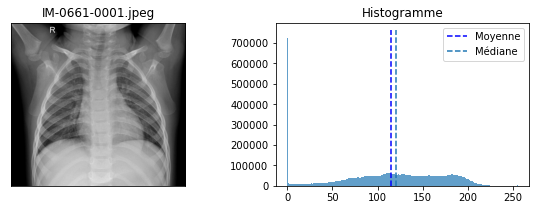

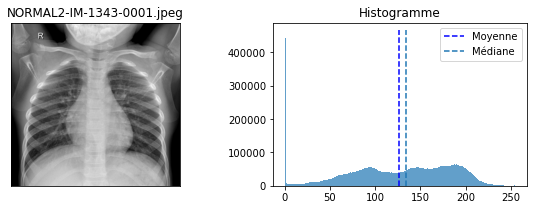

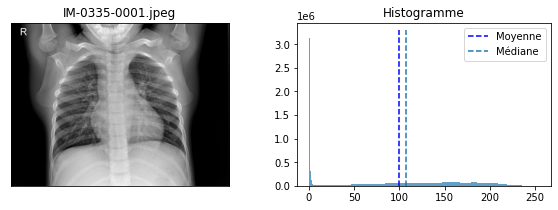

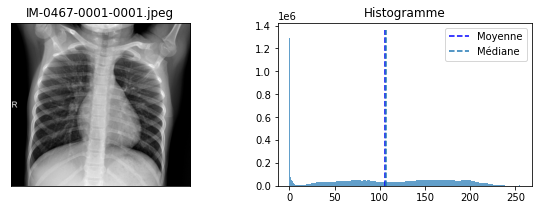

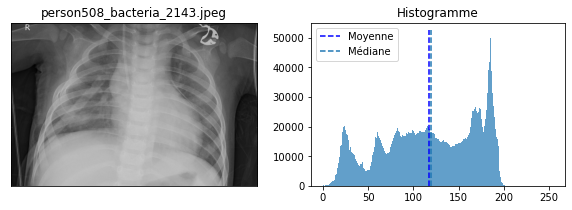

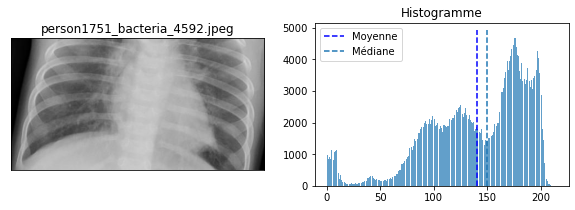

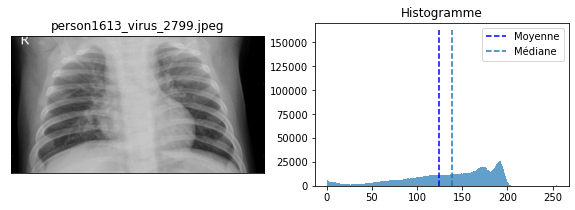

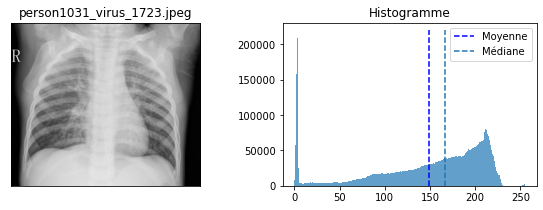

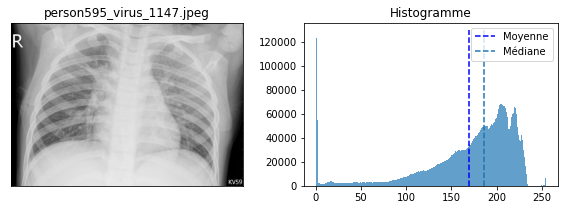

In [85]:
for image_path in list_images:

    show_image(image_path)

**vii) Analyse des valeurs seuil**

La valeur seuil a été fixée à 100.

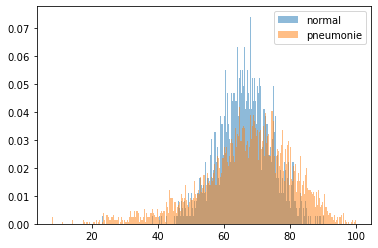

In [86]:
sample_normal = df_normal['Seuil100']

plt.hist(sample_normal, bins = 300, density = True, label = 'normal', alpha = 0.5)

sample_pneumonia = df_pneumonia['Seuil100']

plt.hist(sample_pneumonia, bins = 300, density = True, label = 'pneumonie', alpha = 0.5)

plt.legend();

In [87]:
import scipy.stats as stats

In [88]:
# Comparaison de variances

print(sample_pneumonia.std())
print(sample_normal.std())

# Comparaison de moyennes

print(sample_pneumonia.mean())
print(sample_normal.mean())

13.727341168151819
8.147483930248432
66.76467587175304
66.33647504737844


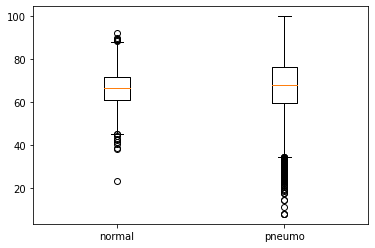

In [89]:
plt.boxplot([sample_normal, sample_pneumonia], labels = ['normal', 'pneumo']);